In [8]:
from settings import *

In [9]:
qubits = TriangularLayoutAB(m=1, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=5)

<Axes: title={'center': 'Qubit layout'}>

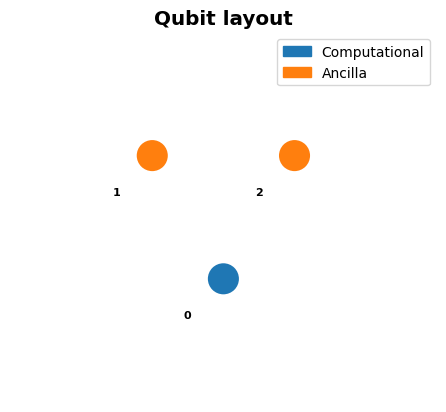

In [10]:
qubits.show_layout()

In [11]:
# theta_opt, errors, thetas = optimize(circuit, training_data, max_count=100)

# np.save("both_theta_opt", theta_opt)
# np.save("both_thetas", thetas)
# np.save("both_errors", errors)

In [12]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

rho_rand_haar: seed=27889


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

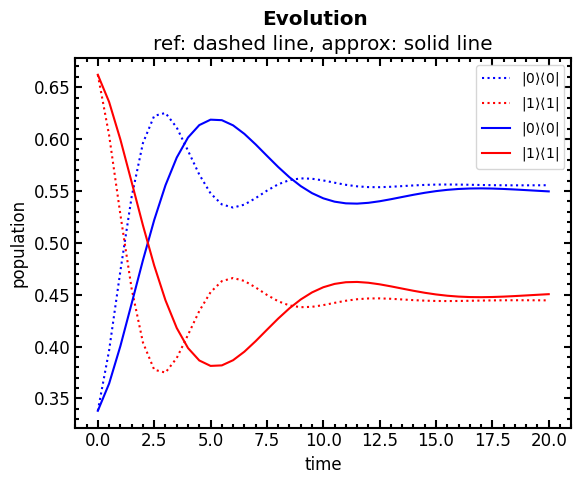

In [13]:
rho0 = rho_rand_haar(1)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(40, rho0)

Os = [O.full() for O in create_observables_comp_basis(1)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=40, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(1))

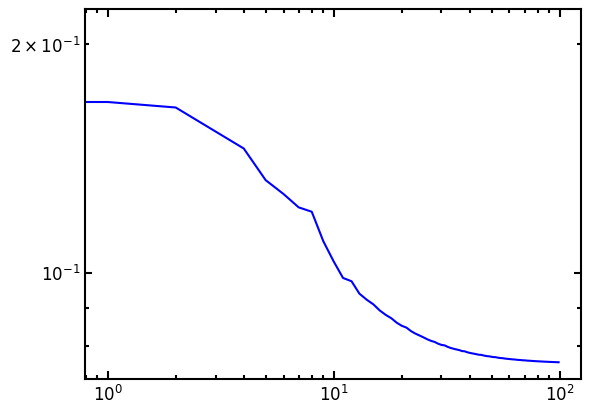

In [14]:
plt.loglog(errors)